<a href="https://colab.research.google.com/github/DivineIbuchim/INSE_6220/blob/main/PCA_RiceSeeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install slim version (default)
!pip install pycaret

In [3]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'3.3.2'

Install Analysis Extras for Explainable AI

In [4]:
!pip install pycaret[analysis]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.0/4.0 MB 28.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.5/177.5 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.8/287.8 kB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.7/14.7 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 34.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.5/222.5 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# **Principal Component Analysis**

Import Libraries

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  2.1.4
Seaborn version:  0.13.2


**Dataset**

The data used in this analysis is Rice Seed Data. Rice, which is among the most widely produced grain products worldwide, has many genetic varieties. These varieties are separated from each other due to some of their features. It has 10 attributes that correspond to the classification of rice seed with these features that distinguish rice varieties, it is possible to classify and evaluate the quality of seeds.In this study Ipsala,Karacadag,Arborio are three different varieties of rice were used. 506 elements each, randomly selected for the experiment with label include area, perimeter, aspect ratio etc. Models were created by using Artificial Neural Network (ANN) and Deep Neural Network (DNN) algorithms for the feature dataset and classification processes were performed.

The data set can be used for the tasks of classification of rive varieties and cluster analysis and evaluate the quality of seeds.

Attribute Information:

To construct the data, Ten geometric parameters and attributes of Rice seed were measured:

Area AR,
perimeter PR,
Majoraxislength MAL,
Minoraxislength MIL,
Eccentricity EC,
EquivDiameter ED,
ConvexArea CA,
Extend EX,
Aspectratio AS,
Roundness RO. All of these parameters were real-valued continuous.

https://www.muratkoklu.com/datasets/

https://www.muratkoklu.com/datasets/vtdhnd08.php

https://github.com/DivineIbuchim/INSE_6220/raw/refs/heads/main/seed.csv


In [8]:
import pandas as pd

# Read the CSV file from the raw GitHub link
df = pd.read_csv('https://github.com/DivineIbuchim/INSE_6220/raw/refs/heads/main/seed.csv')
df.head(25)


AR       PR       MAL      MIL      EC        ED     CA      EX  \
0   11648  445.527  178.4659  84.9327  0.8795  121.7813  12135  0.5660   
1   12769  447.830  184.4764  88.6296  0.8770  127.5068  13024  0.6733   
2   14835  488.965  196.5303  97.3891  0.8686  137.4355  15263  0.6910   
3    9475  408.427  178.9363  67.5776  0.9259  109.8360   9652  0.5299   
4   12849  456.372  188.4676  88.1827  0.8838  127.9056  13187  0.7814   
5   14883  485.363  203.2395  94.3304  0.8858  137.6576  15093  0.6267   
6   13545  470.587  198.7273  88.0138  0.8966  131.3241  13788  0.5821   
7   13084  460.910  190.8731  88.5734  0.8858  129.0700  13347  0.5865   
8   12501  451.281  185.8183  87.0528  0.8835  126.1617  12844  0.6212   
9   15917  515.441  212.7014  97.5204  0.8887  142.3592  16400  0.6048   
10  14106  476.343  196.1112  92.5838  0.8815  134.0161  14485  0.5871   
11  14301  480.164  187.6669  99.3781  0.8483  134.9392  14951  0.6070   
12  13938  472.339  193.2652  93.5004  0.8752  133.2157  14269  0.5999   
13  14829  480.976  199.1518  95.1992  0.8783  137.4077  15083  0.7572   
14  14540  483.862  198.2025  95.1757  0.8772  136.0621  15005  0.7734   
15  13409  460.872  186.1797  93.2367  0.8656  130.6632  13667  0.7145   
16  13637  457.787  189.1338  92.4826  0.8723  131.7694  13834  0.8014   
17  10760  414.906  170.6515  81.9291  0.8772  117.0472  11037  0.7535   
18  12206  445.762  185.6769  84.6475  0.8900  124.6642  12500  0.7538   
19  12550  453.018  187.1744  86.4708  0.8869  126.4087  12793  0.6137   
20  12488  458.579  191.0610  84.4833  0.8969  126.0961  12813  0.5513   
21  12843  466.299  197.1622  83.9702  0.9048  127.8758  13166  0.6398   
22  15532  506.083  207.2012  97.0122  0.8836  140.6270  16026  0.5726   
23  14446  488.048  203.3706  91.7769  0.8924  135.6216  14800  0.6465   
24  11223  442.892  190.5174  75.9964  0.9170  119.5390  11463  0.7753   

        AS      RO  class  
0   2.1013  0.7374      1  
1   2.0814  0.8001      1  
2   2.0180  0.7797      1  
3   2.6479  0.7138      1  
4   2.1372  0.7752      1  
5   2.1545  0.7939      1  
6   2.2579  0.7686      1  
7   2.1550  0.7740      1  
8   2.1345  0.7714      1  
9   2.1811  0.7529      1  
10  2.1182  0.7812      1  
11  1.8884  0.7795      1  
12  2.0670  0.7851      1  
13  2.0919  0.8055      1  
14  2.0825  0.7804      1  
15  1.9968  0.7933      1  
16  2.0451  0.8177      1  
17  2.0829  0.7855      1  
18  2.1935  0.7719      1  
19  2.1646  0.7685      1  
20  2.2615  0.7462      1  
21  2.3480  0.7422      1  
22  2.1358  0.7621      1  
23  2.2159  0.7621      1  
24  2.5069  0.7190      1

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AR      506 non-null    int64  
 1   PR      506 non-null    float64
 2   MAL     506 non-null    float64
 3   MIL     506 non-null    float64
 4   EC      506 non-null    float64
 5   ED      506 non-null    float64
 6   CA      506 non-null    int64  
 7   EX      506 non-null    float64
 8   AS      506 non-null    float64
 9   RO      506 non-null    float64
 10  class   506 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 43.6 KB


In [10]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AR      506 non-null    int64  
 1   PR      506 non-null    float64
 2   MAL     506 non-null    float64
 3   MIL     506 non-null    float64
 4   EC      506 non-null    float64
 5   ED      506 non-null    float64
 6   CA      506 non-null    int64  
 7   EX      506 non-null    float64
 8   AS      506 non-null    float64
 9   RO      506 non-null    float64
 10  class   506 non-null    int64  
dtypes: float64(8), int64(3)
memory usage: 43.6 KB


In [12]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

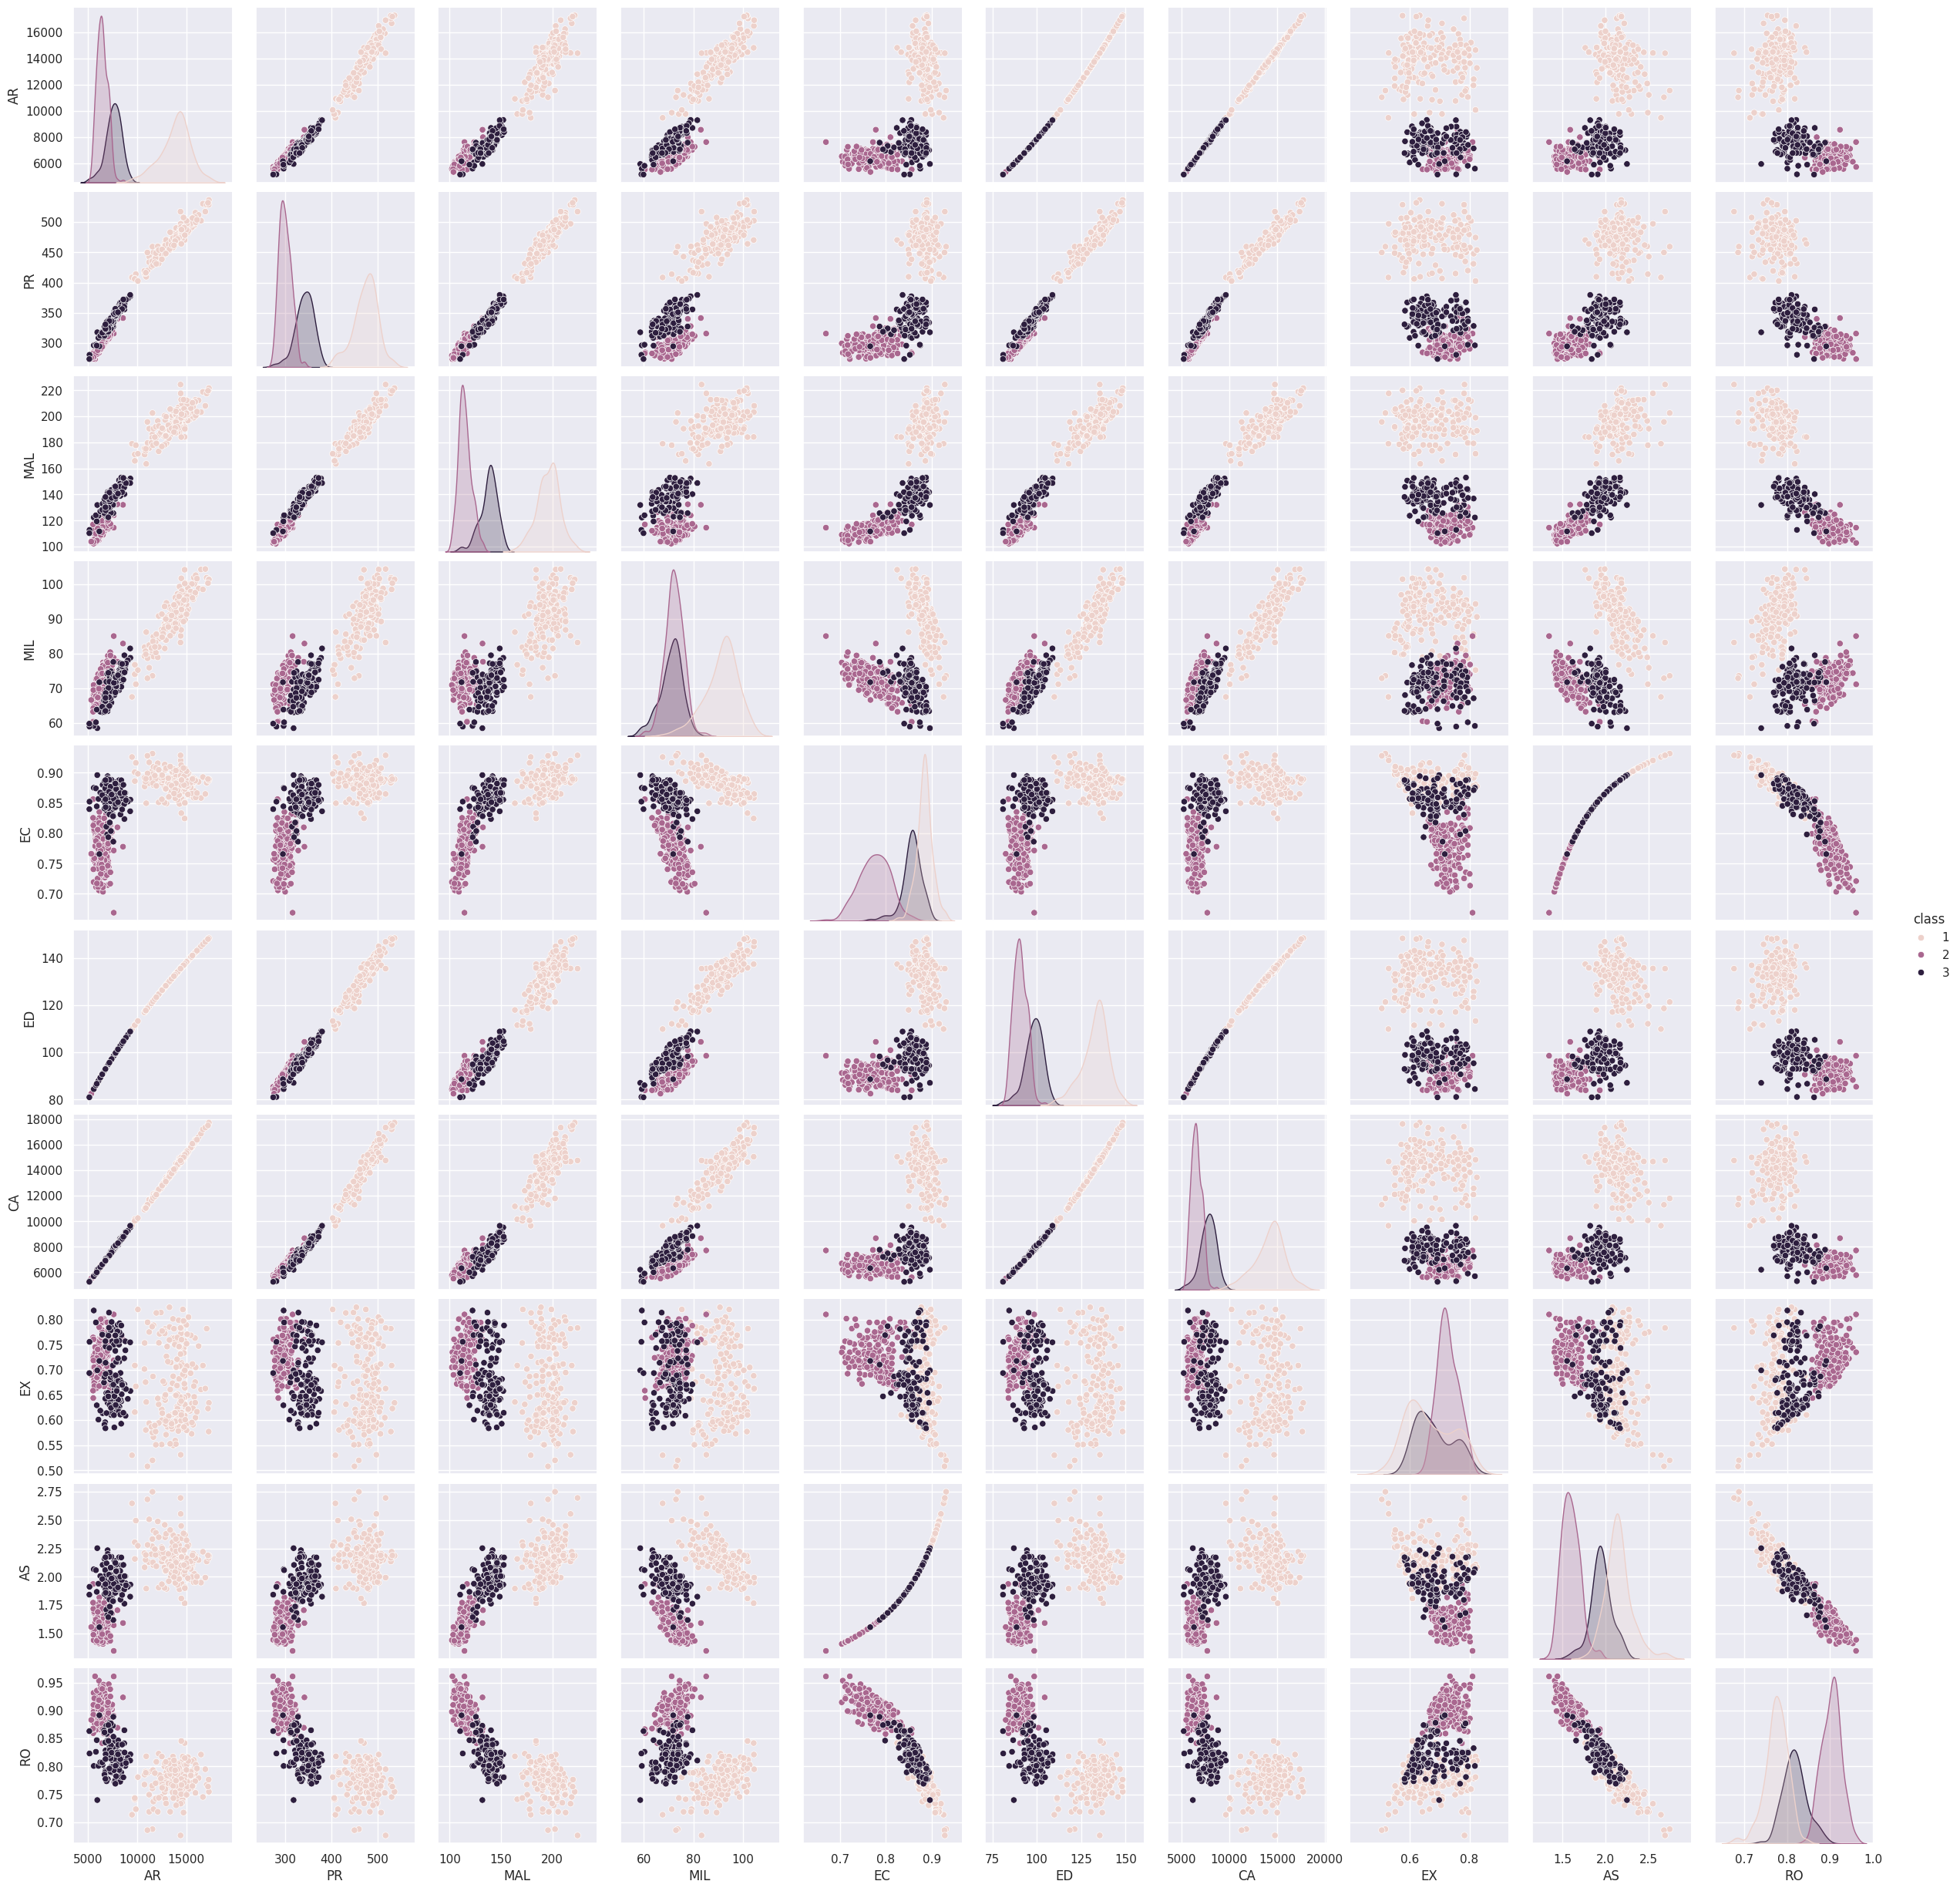

In [14]:
sns.pairplot(df, hue='class')
plt.show()

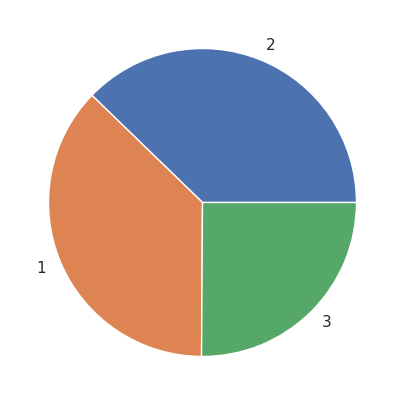

In [17]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [18]:
X = df.drop(columns=['class'])
X.head(10)

AR       PR       MAL      MIL      EC        ED     CA      EX      AS  \
0  11648  445.527  178.4659  84.9327  0.8795  121.7813  12135  0.5660  2.1013   
1  12769  447.830  184.4764  88.6296  0.8770  127.5068  13024  0.6733  2.0814   
2  14835  488.965  196.5303  97.3891  0.8686  137.4355  15263  0.6910  2.0180   
3   9475  408.427  178.9363  67.5776  0.9259  109.8360   9652  0.5299  2.6479   
4  12849  456.372  188.4676  88.1827  0.8838  127.9056  13187  0.7814  2.1372   
5  14883  485.363  203.2395  94.3304  0.8858  137.6576  15093  0.6267  2.1545   
6  13545  470.587  198.7273  88.0138  0.8966  131.3241  13788  0.5821  2.2579   
7  13084  460.910  190.8731  88.5734  0.8858  129.0700  13347  0.5865  2.1550   
8  12501  451.281  185.8183  87.0528  0.8835  126.1617  12844  0.6212  2.1345   
9  15917  515.441  212.7014  97.5204  0.8887  142.3592  16400  0.6048  2.1811   

       RO  
0  0.7374  
1  0.8001  
2  0.7797  
3  0.7138  
4  0.7752  
5  0.7939  
6  0.7686  
7  0.7740  
8  0.7714  
9  0.7529

In [19]:
X.describe().transpose()

count         mean          std        min          25%         50%  \
AR   506.0  9487.895257  3554.704699  5146.0000  6529.750000  7667.00000   
PR   506.0   374.466891    80.376250   273.6300   302.951500   341.99250   
MAL  506.0   150.675767    36.918690   102.2313   116.284275   138.80810   
MIL  506.0    78.901814    10.816671    58.5632    71.057325    74.63920   
EC   506.0     0.835774     0.054863     0.6688     0.790050     0.85555   
ED   506.0   108.088237    19.952034    80.9450    91.180825    98.80245   
CA   506.0  9696.389328  3643.710367  5254.0000  6664.000000  7867.00000   
EX   506.0     0.694532     0.065862     0.5078     0.640975     0.70370   
AS   506.0     1.891967     0.278332     1.3452     1.631225     1.93160   
RO   506.0     0.834320     0.061677     0.6768     0.782850     0.82075   

              75%         max  
AR   13452.500000  17285.0000  
PR     463.930750    536.4050  
MAL    190.913525    224.4403  
MIL     89.426050    104.4405  
EC       0.880450      0.9315  
ED     130.874925    148.3508  
CA   13760.250000  17732.0000  
EX       0.749600      0.8246  
AS       2.108900      2.7500  
RO       0.893175      0.9610

**Standardize the Data**

In [20]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

AR        PR       MAL       MIL        EC        ED        CA  \
0  0.608276  0.884968  0.753484  0.558107  0.797798  0.686978  0.669928   
1  0.923945  0.913649  0.916449  0.900223  0.752185  0.974225  0.914152   
2  1.505722  1.425936  1.243270  1.710839  0.598924  1.472346  1.529243   
3 -0.003631  0.422932  0.766238 -1.047958  1.644383  0.087685 -0.012195   
4  0.946473  1.020030  1.024663  0.858866  0.876253  0.994233  0.958931   
5  1.519238  1.381078  1.425179  1.427783  0.912744  1.483489  1.482541   
6  1.142463  1.197060  1.302838  0.843236  1.109794  1.165739  1.124035   
7  1.012648  1.076545  1.089885  0.895022  0.912744  1.052651  1.002885   
8  0.848477  0.956627  0.952832  0.754304  0.870780  0.906742  0.864703   
9  1.810408  1.755663  1.681723  1.722990  0.965655  1.719367  1.841597   

         EX        AS        RO  
0 -1.953474  0.752845 -1.572979  
1 -0.322694  0.681277 -0.555381  
2 -0.053684  0.453266 -0.886466  
3 -2.502134  2.718633 -1.955999  
4  1.320245  0.881955 -0.959499  
5 -1.030936  0.944173 -0.656005  
6 -1.708781  1.316040 -1.066615  
7 -1.641909  0.945971 -0.978975  
8 -1.114527  0.872245 -1.021172  
9 -1.363779  1.039837 -1.321420

In [21]:
X.describe().transpose()

count          mean      std       min       25%       50%       75%  \
AR   506.0  0.000000e+00  1.00099 -1.222659 -0.833001 -0.512756  1.116416   
PR   506.0 -5.616939e-17  1.00099 -1.255802 -0.890638 -0.404430  1.114165   
MAL  506.0  1.123388e-16  1.00099 -1.313492 -0.932469 -0.321772  1.090981   
MIL  506.0 -5.055245e-16  1.00099 -1.882163 -0.725940 -0.394468  0.973927   
EC   506.0 -1.937844e-15  1.00099 -3.046499 -0.834249  0.360822  0.815131   
ED   506.0 -1.123388e-16  1.00099 -1.361771 -0.848242 -0.465866  1.143204   
CA   506.0 -2.808469e-16  1.00099 -1.220400 -0.833049 -0.502565  1.116412   
EX   506.0  1.404235e-16  1.00099 -2.838017 -0.813980  0.139335  0.836938   
AS   506.0  8.425408e-16  1.00099 -1.966387 -0.937729  0.142537  0.780178   
RO   506.0 -5.336092e-16  1.00099 -2.556496 -0.835342 -0.220239  0.955193   

          max  
AR   2.195631  
PR   2.016745  
MAL  2.000004  
MIL  2.363385  
EC   1.746557  
ED   2.019965  
CA   2.207520  
EX   1.976813  
AS   3.085825  
RO   2.055968

**Observations and variables**

In [22]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

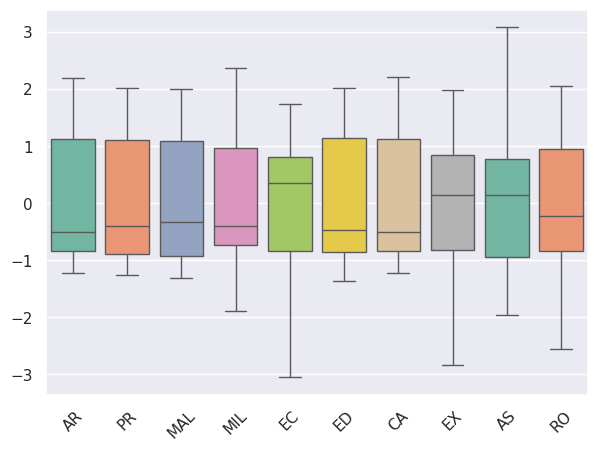

In [23]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

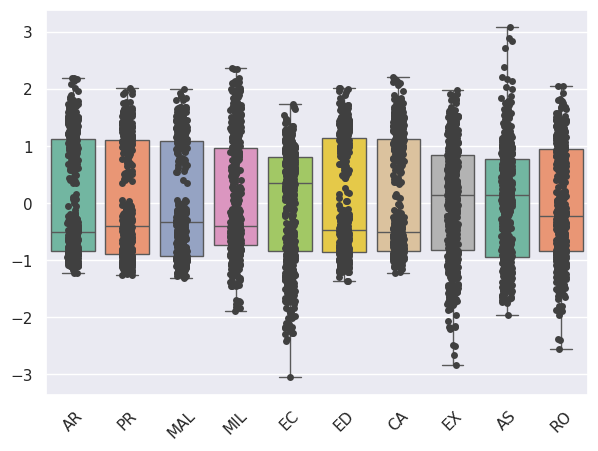

In [24]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

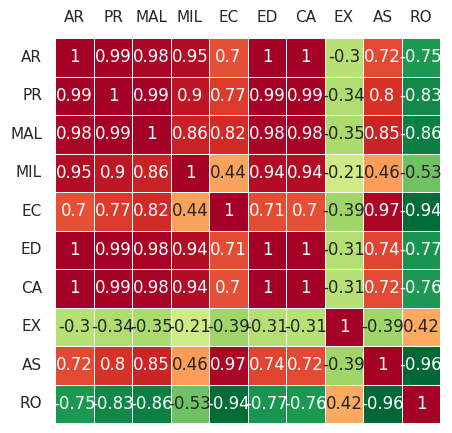

In [25]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Applying PCA**

Text(0, 0.5, '$Z_2$')

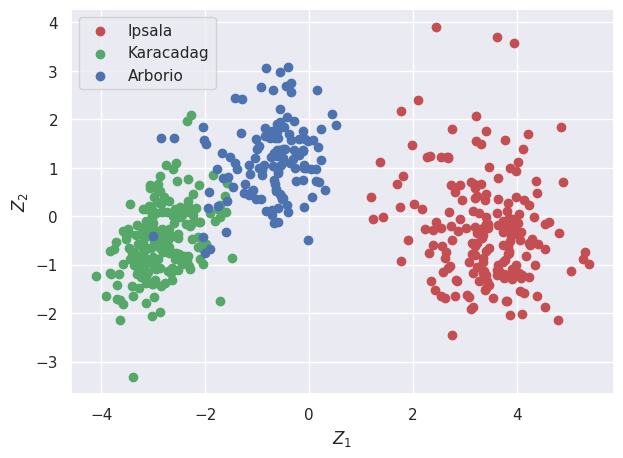

In [27]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Ipsala)->1,  2(Karacadag)->2, 3(Arborio)->3
idx_Ipsala = np.where(y == 1)
idx_Karacadag = np.where(y == 2)
idx_Arborio = np.where(y == 3)

plt. figure()
plt.scatter(Z[idx_Ipsala,0], Z[idx_Ipsala,1], c='r', label='Ipsala')
plt.scatter(Z[idx_Karacadag,0], Z[idx_Karacadag,1], c='g', label='Karacadag')
plt.scatter(Z[idx_Arborio,0], Z[idx_Arborio,1], c='b', label='Arborio')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

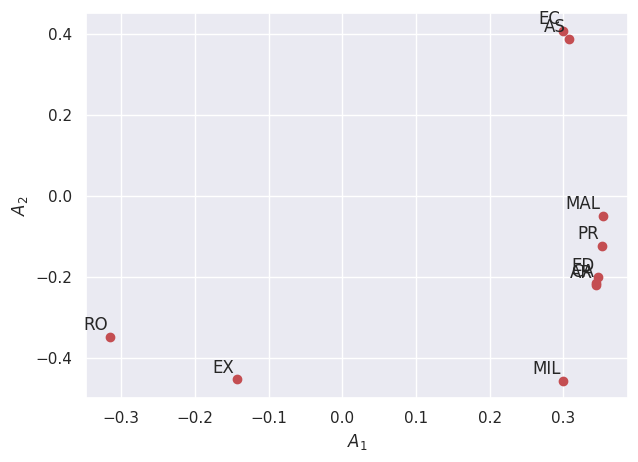

In [28]:
A = pca.components_.T

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

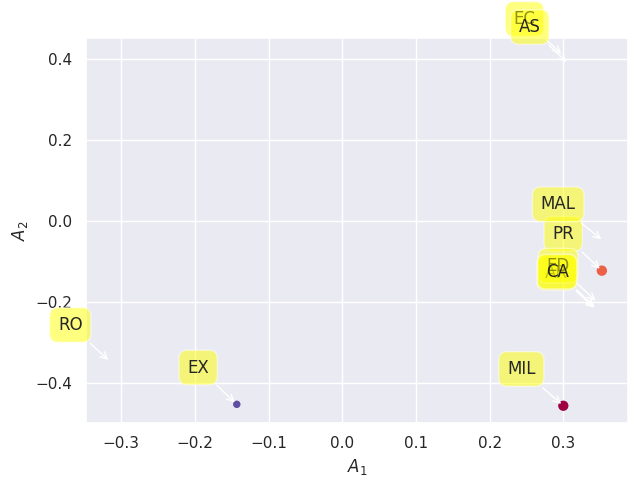

In [29]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

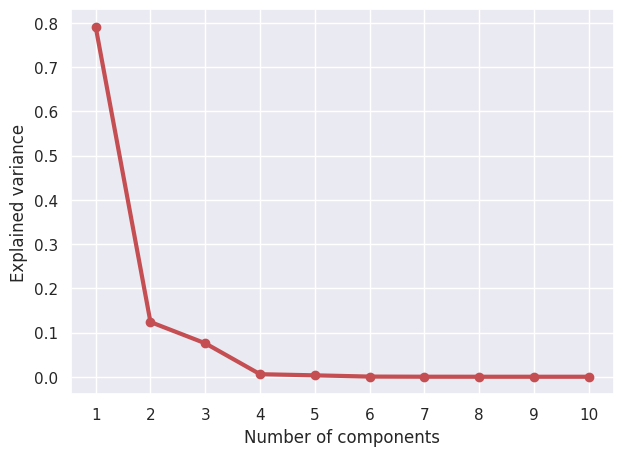

In [36]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

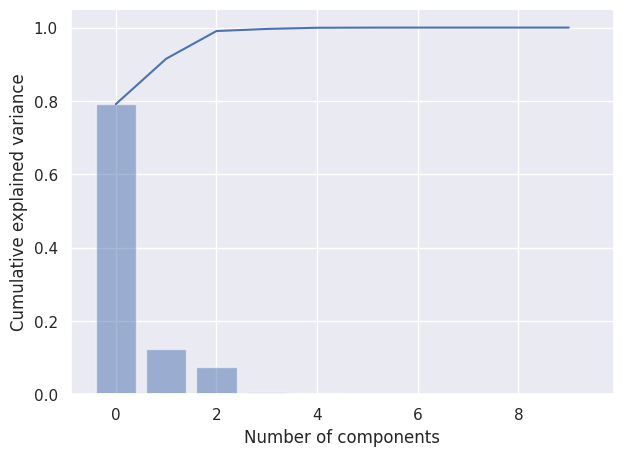

In [37]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

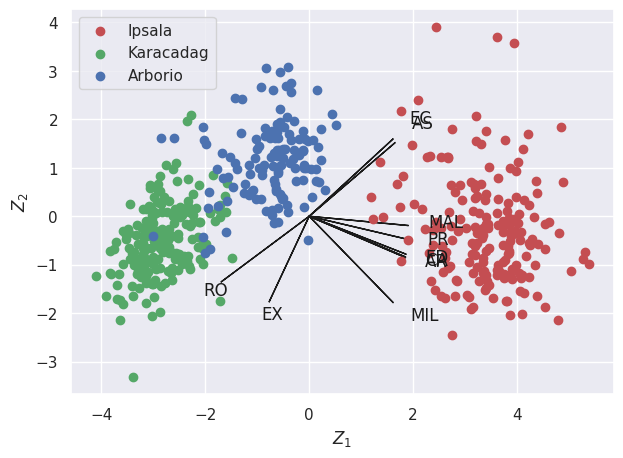

In [39]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Ipsala,0], Z[idx_Ipsala,1], c='r', label='Ipsala')
plt.scatter(Z[idx_Karacadag,0], Z[idx_Karacadag,1], c='g', label='Karacadag')
plt.scatter(Z[idx_Arborio,0], Z[idx_Arborio,1], c='b', label='Arborio')
plt.legend(loc='upper left')

# **Using PCA Library**

In [40]:
!pip install pca

In [41]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [10] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [10] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [42]:
out['PC']

PC1       PC2       PC3
0    2.668693  1.232398 -1.182958
1    2.542091 -0.249357 -0.073936
2    3.615738 -1.213582 -0.106952
3    2.431913  3.908933 -0.433532
4    2.626418 -0.740735  1.542344
..        ...       ...       ...
501 -0.594100  0.884222  0.240800
502 -1.396575  0.972696  1.340565
503 -0.629443  0.514353  0.645202
504  0.524242  1.889406 -0.335545
505 -0.405284  3.069580 -0.409183

[506 rows x 3 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.63%] of the variance'}, xlabel='PC1 (79.1% expl.var)', ylabel='PC2 (12.3% expl.var)'>)

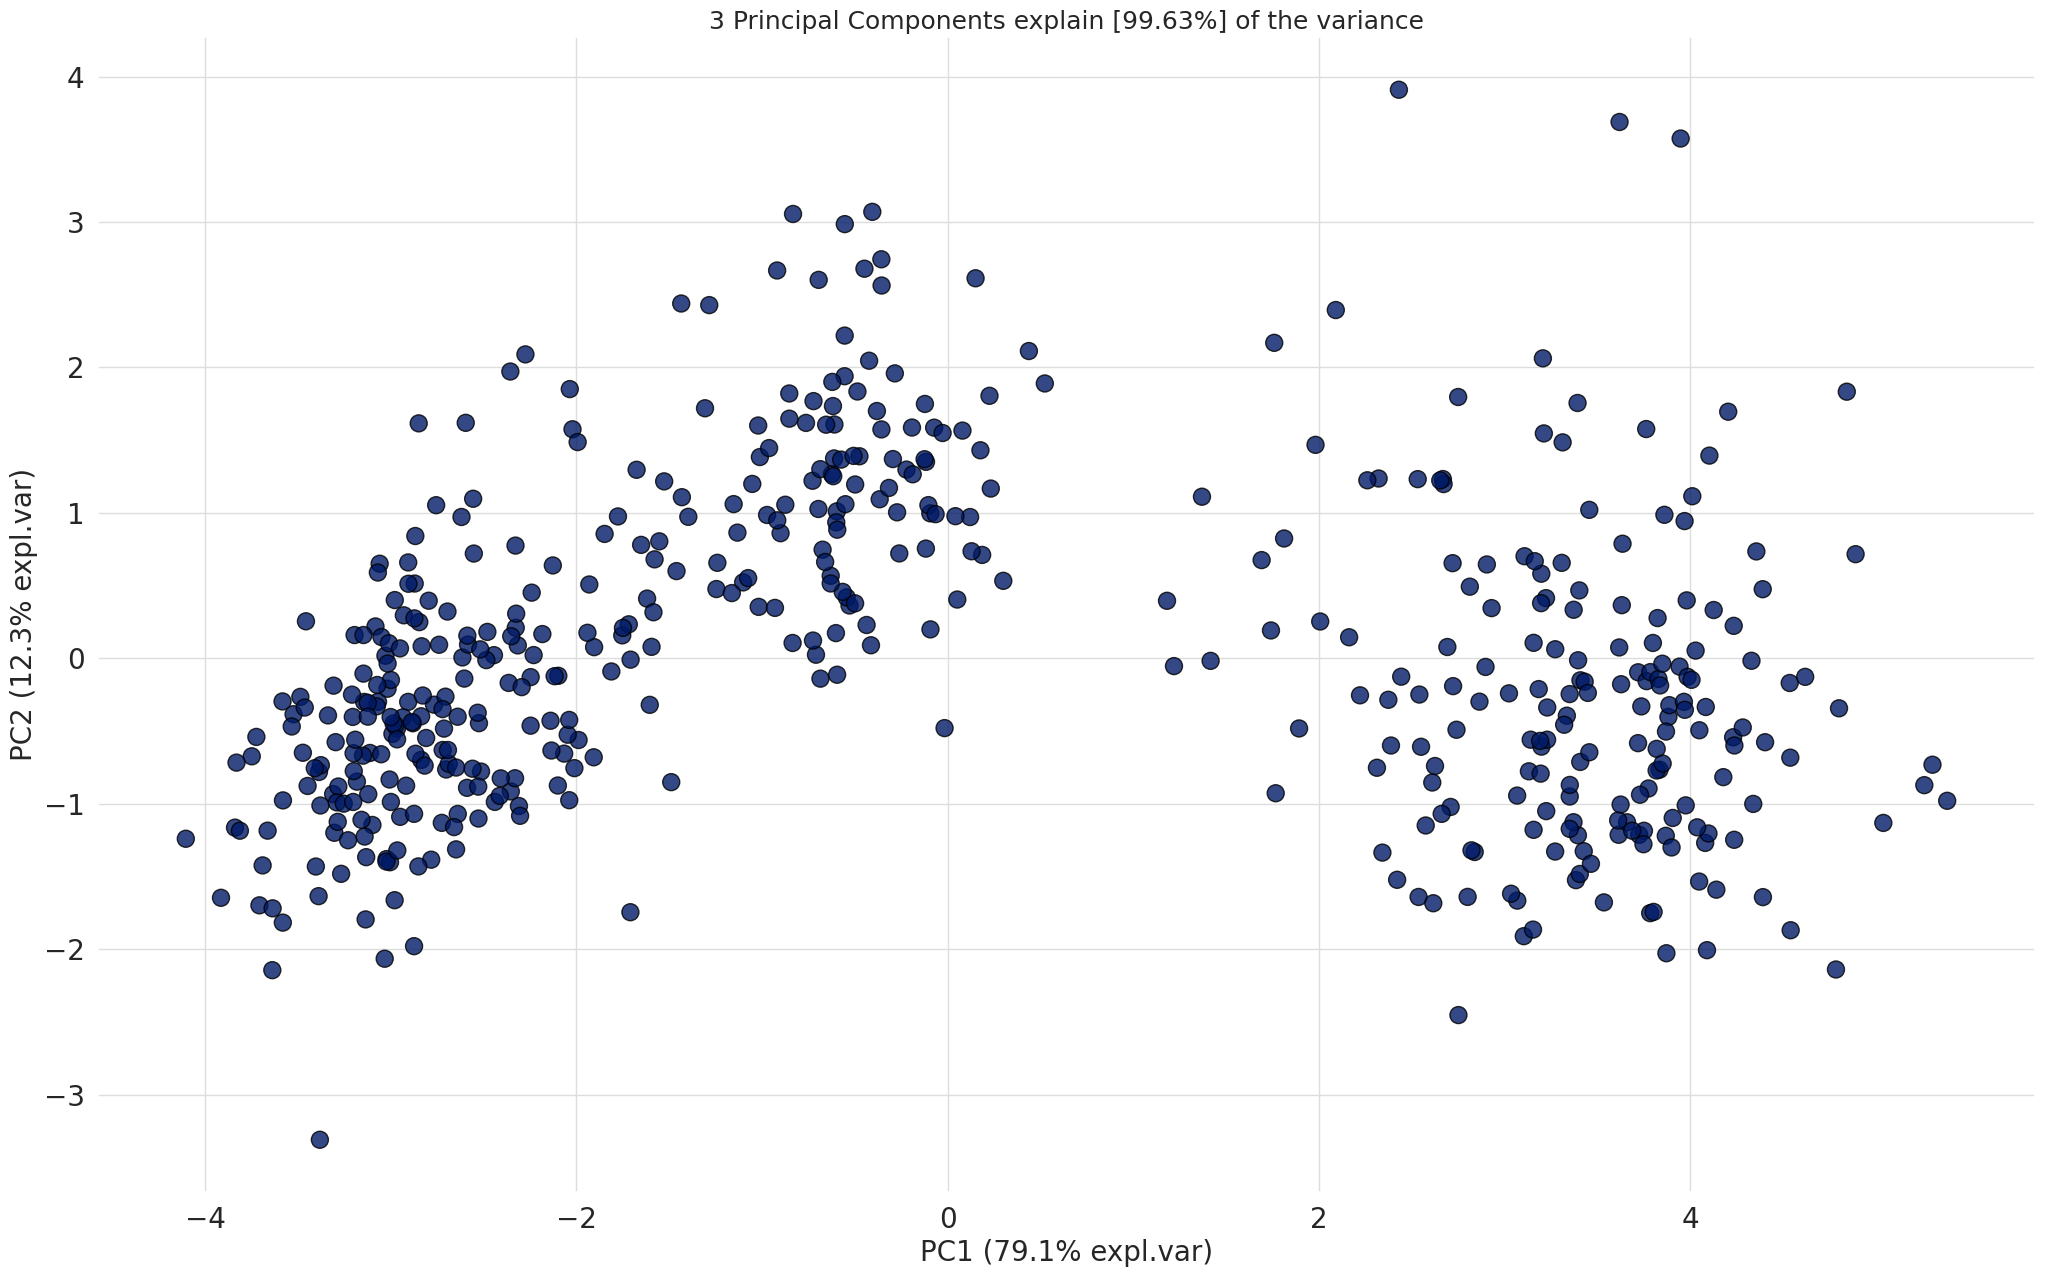

In [43]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [84]:
A = out['loadings'].T

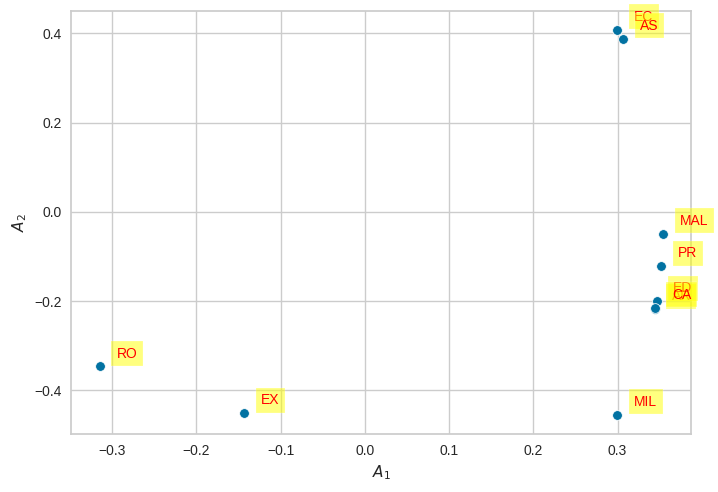

In [85]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

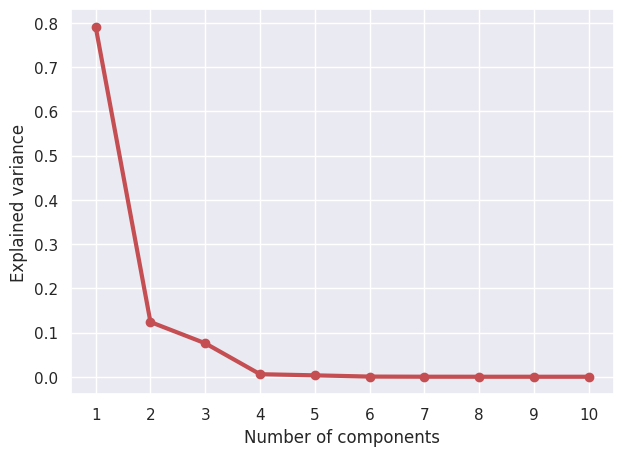

In [45]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

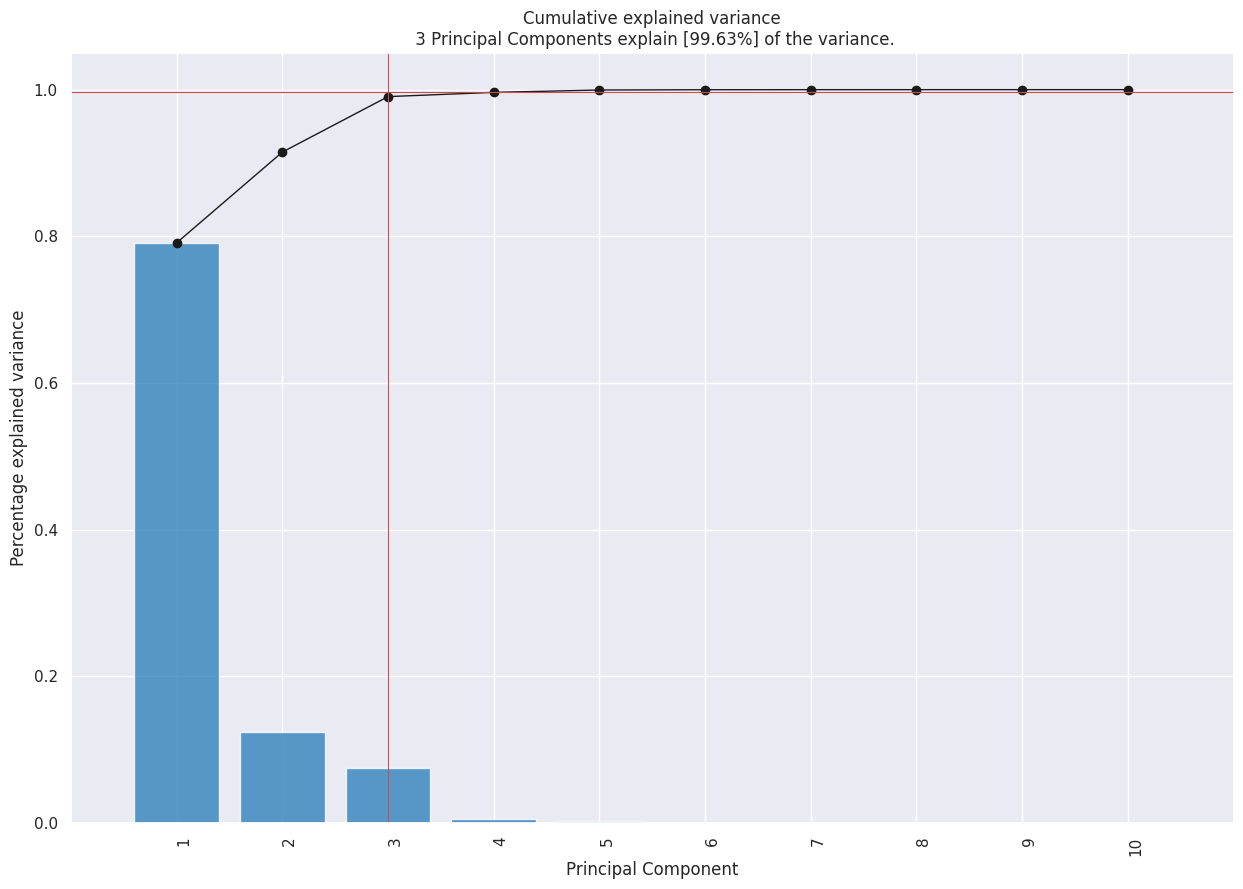

In [46]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.63%] of the variance'}, xlabel='PC1 (79.1% expl.var)', ylabel='PC2 (12.3% expl.var)'>)

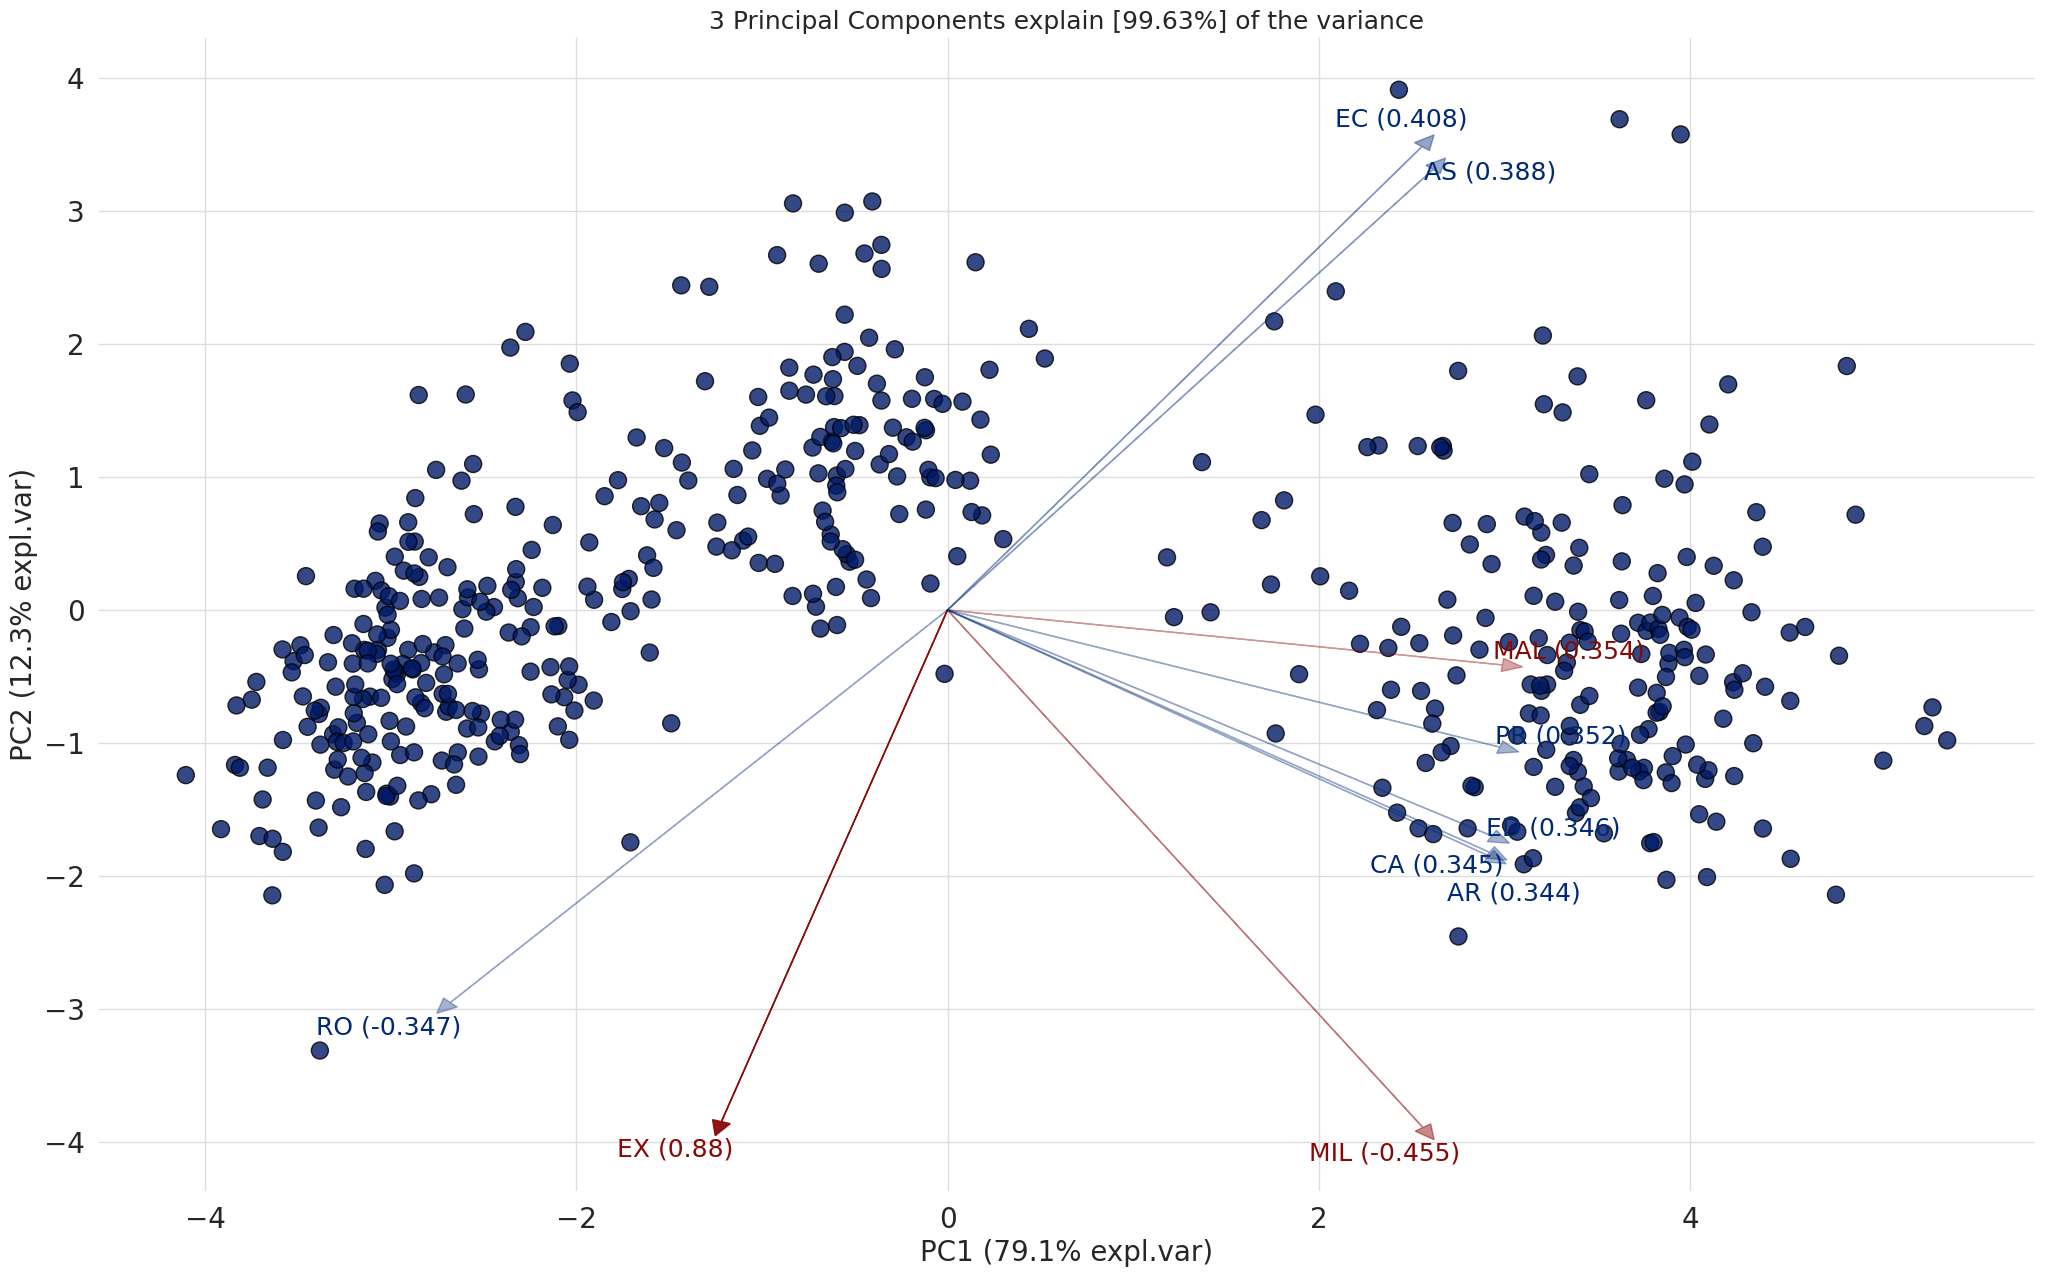

In [47]:
model.biplot(label=False, legend=False)

# Multiclass Classification with PyCaret

Multiclass classification is a supervised machine learning technique where the goal is to classify instances into one of three or more classes. (Classifying instances into one of two classes is called Binary Classification).

**Data Splitting**

In order to demonstrate the predict_model() function on unseen data, a sample of 60 observations has been withheld from the original dataset to be used for predictions. This should not be confused with a train/test split as this particular split is performed to simulate a real life scenario. Another way to think about this is that these 60 records were not available at the time when the machine learning experiment was performed.

In [48]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (455, 11)
Unseen Data For Predictions: (51, 11)


**Setting up the Environment in PyCaret**

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment. setup() must be called before executing any other function in pycaret. It takes two mandatory parameters: a pandas dataframe and the name of the target column. All other parameters are optional and are used to customize the pre-processing pipeline.

When setup() is executed, PyCaret's inference algorithm will automatically infer the data types for all features based on certain properties. The data type should be inferred correctly but this is not always the case. To account for this, PyCaret displays a table containing the features and their inferred data types after setup() is executed. If all of the data types are correctly identified enter can be pressed to continue or quit can be typed to end the expriment. Ensuring that the data types are correct is of fundamental importance in PyCaret as it automatically performs a few pre-processing tasks which are imperative to any machine learning experiment. These tasks are performed differently for each data type which means it is very important for them to be correctly configured.

In [50]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

**Comparing all Machine Learning Models**

In [51]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [52]:
best_model

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

**Create a Model**

create_model is the most granular function in PyCaret and is often the foundation behind most of the PyCaret functionalities. As the name suggests this function trains and evaluates a model using cross validation that can be set with fold parameter. The output prints a score grid that shows Accuracy, Recall, Precision, F1, Kappa and MCC by fold.

For the remaining part of this tutorial, we will work with the below models as our candidate models. The selections are for illustration purposes only and do not necessarily mean they are the top performing or ideal for this type of data.

Decision Tree Classifier ('dt')
K Neighbors Classifier ('knn')
Logistic Regression ('lr')
There are many classifiers available in the model library of PyCaret. Please view the create_model() docstring for the list of all available models.

**Create Decision Tree Classifier**




In [53]:
dt = create_model('dt')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [54]:
#trained model object is stored in the variable 'dt'.
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Tune a Model**: How to automatically tune the hyper-parameters of a multiclass model. When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. The tune_model() function is a random grid search of hyperparameters over a pre-defined search space. By default, it is set to optimize Accuracy but this can be changed using optimize parameter. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation. The output prints a score grid that shows Accuracy, AUC, Recall, Precision, F1 and Kappa by fold.

**Tune Decision Tree Model**

In [55]:
tuned_dt = tune_model(dt)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [56]:
#tuned model object is stored in the variable 'tuned_dt'.
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0001, min_samples_leaf=4,
                       min_samples_split=10, min_weight_fraction_leaf=0.0,
                       monotonic_cst=None, random_state=123, splitter='best')

**Evaluate Decision Tree Model**





How to analyze model performance using various plots

In [57]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create K Neighbors Model**

In [58]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune K Neighbors Model**

In [59]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate K Neighbors Model**

In [60]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Logistic Regression Model**

In [61]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [62]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune Logistic Regression Model**

In [63]:
tuned_lr = tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**Evaluate Logistic Regression Model**

In [64]:
tuned_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create Random Forest Model**

In [66]:
rf = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune Random Forest Model**

In [67]:
tuned_rf = tune_model(rf)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate Random Forest Model**

In [68]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Tune the Best Model**

In [69]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [70]:
tuned_best_model

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [71]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Classification + PCA**

In [73]:
clf_pca = setup(data=df, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

In [74]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [75]:
best_model_pca

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

**Tune the Best Model**

In [76]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [77]:
tuned_best_model_pca

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=123, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

**Evaluate the Best Model**

One way to analyze the performance of models is to use the evaluate_model() function which displays a user interface for all of the available plots for a given model. It internally uses the plot_model() function.

In [78]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# Explainable AI with Shapley values
Shapley values are a widely used approach from cooperative game theory that come with desirable properties.

In [79]:
rf_pca = create_model('rf')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [80]:
tuned_rf_pca = tune_model(rf_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


**SHAP Summary Plot**

Rather than using a typical feature importance bar chart, we use a density scatter plot of SHAP values for each feature to identify how much impact each feature has on the model output for individuals in the validation dataset. Features are sorted by the sum of the SHAP value magnitudes across all samples.

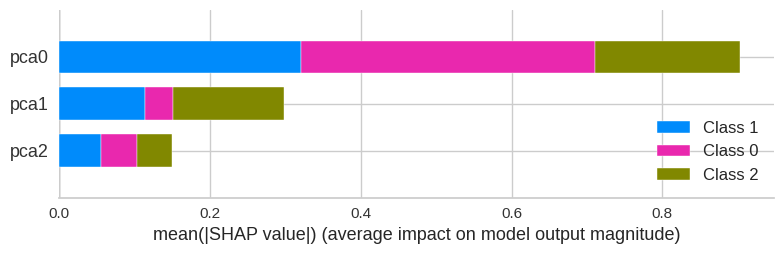

In [81]:
interpret_model(tuned_rf_pca, plot='summary')

In [ ]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [82]:
interpret_model(tuned_rf_pca, plot='reason', observation=32)

**Visualize many predictions**

In [83]:
interpret_model(tuned_rf_pca, plot='reason')